# Fraud Detection using a Hybrid Model (SOM + ANN)
 

# Firstly, fraud Detection using SOM 

Detecting banking fraud using an unsupervised learning called Self Organizing Maps (SOM). 

We will apply this method on a high dimensional dataset full of nonlinear relationships, 

our model will detect a pattern regarding fraudulent behavior

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# data taken from UCI repository: 'Statlog (Australian Credit Approval) dataset'
data = pd.read_csv(r'D:\Udemy\Deep_Learning_A-Z\Volume 2 - Unsupervised Deep Learning\Part 4 - Self Organizing Maps (SOM)\Self_Organizing_Maps\Credit_Card_Applications.csv')
data

# As seen in the below dataframe, all the attribute names and values have been changed to -
# - meaningless symbol to protect confidentiality
# Now, since data looks all meaningless to a human, we need a DL model to catch the perpetrators

# Here rows are the customers, columns are the customer attributes

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [3]:
# first we divide the dataset into: 1) feature where a customer did/did not got his credit card approved
# 2) All other features
X = data.drop('Class', axis = 1).values
y = data['Class'].values
X
# Note: y are not labels

array([[1.5776156e+07, 1.0000000e+00, 2.2080000e+01, ..., 2.0000000e+00,
        1.0000000e+02, 1.2130000e+03],
       [1.5739548e+07, 0.0000000e+00, 2.2670000e+01, ..., 2.0000000e+00,
        1.6000000e+02, 1.0000000e+00],
       [1.5662854e+07, 0.0000000e+00, 2.9580000e+01, ..., 2.0000000e+00,
        2.8000000e+02, 1.0000000e+00],
       ...,
       [1.5675450e+07, 0.0000000e+00, 1.8830000e+01, ..., 2.0000000e+00,
        1.0000000e+02, 1.0000000e+00],
       [1.5776494e+07, 0.0000000e+00, 2.7420000e+01, ..., 2.0000000e+00,
        1.2000000e+02, 1.2000000e+01],
       [1.5592412e+07, 1.0000000e+00, 4.1000000e+01, ..., 1.0000000e+00,
        5.6000000e+02, 1.0000000e+00]])

In [4]:
y

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,

### feature scaling 

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)
X

array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]])

### Implementing SOM
Since there is no sklearn module for SOM we shall use MiniSom package 

This package was developed in numpy and is shared under creative commons license

In [6]:
pip install minisom

Note: you may need to restart the kernel to use updated packages.


In [7]:
# we shall make a map of 10*10 grid, smaller map would not be able to catch outliers (frauds)
# too large is not required since we do not have many observations
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
# input_len = features, sigma = radius of updation around each neuron

In [8]:
# training the map
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

Visualizing the SOM; get the MID(Mean Interneuron Distance) 

Which is the mean of distances of all the neurons around the winning node (within radis = sigma)

Higher the MID, farther is the winning node from its neighbors(outlier)

In [9]:
# since maps cannot be made from conventional matplotlib, we use pylab
from pylab import bone, pcolor, colorbar, plot, show

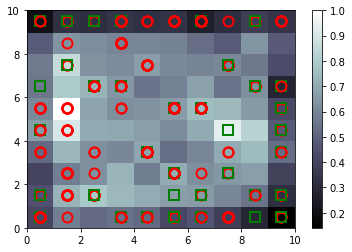

In [10]:
bone() # initialize the window
pcolor(som.distance_map().T) # All the MID in one matrix
colorbar() # legend of colors

# adding markers of whether the associated customers got approval or not
# since in fraud detection, only the ones that got approval are relevant to us
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x) # getting the winning node of customer i
    plot(w[0] + 0.5, # position of marker
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()
    

In [11]:
# Finding the frauds
# there is no 'inverse transform' fn in minisom however we can use dict. that may contain all the mappings
# from winning nodes to customers
mappings = som.win_map(X)

In [12]:
mappings

defaultdict(list,
            {(4,
              7): [array([0.84268147, 1.        , 0.12526316, 0.40928571, 0.5       ,
                     0.23076923, 0.375     , 0.05561404, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.05      , 0.01212   ]), array([0.81120334, 1.        , 0.17789474, 0.01196429, 0.5       ,
                     0.23076923, 0.875     , 0.12280702, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.17      , 0.        ]), array([5.45275078e-01, 1.00000000e+00, 5.26315789e-02, 1.07142857e-01,
                     5.00000000e-01, 2.30769231e-01, 3.75000000e-01, 1.40350877e-03,
                     0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
                     5.00000000e-01, 8.00000000e-02, 4.00000000e-04]), array([0.75215934, 1.        , 0.32827068, 0.02678571, 0.5       ,
                     0.23076923, 0.375     , 0.05263158, 0.        , 0.        ,
                     0. 

In [31]:
# getting customers associated with the outlier nodes
frauds = np.concatenate((mappings[(1, 5)], mappings[(7, 4)], mappings[(1, 4)], 
                         mappings[(1, 7)]), axis = 0)

In [32]:
frauds

array([[9.93092512e-01, 1.00000000e+00, 4.37293233e-01, 4.46428571e-02,
        5.00000000e-01, 4.61538462e-01, 3.75000000e-01, 4.86842105e-01,
        0.00000000e+00, 1.00000000e+00, 1.49253731e-02, 1.00000000e+00,
        5.00000000e-01, 1.76000000e-01, 1.12000000e-03],
       [9.99311253e-01, 1.00000000e+00, 2.07969925e-01, 1.16071429e-01,
        0.00000000e+00, 7.69230769e-01, 8.75000000e-01, 1.78421053e-01,
        0.00000000e+00, 1.00000000e+00, 2.98507463e-02, 1.00000000e+00,
        5.00000000e-01, 1.84500000e-01, 1.00000000e-05],
       [8.33783822e-01, 1.00000000e+00, 2.88270677e-01, 8.92857143e-02,
        5.00000000e-01, 3.84615385e-01, 3.75000000e-01, 6.14035088e-02,
        0.00000000e+00, 1.00000000e+00, 2.98507463e-02, 1.00000000e+00,
        5.00000000e-01, 3.60000000e-01, 0.00000000e+00],
       [9.60693392e-01, 1.00000000e+00, 2.11729323e-01, 5.35714286e-02,
        5.00000000e-01, 6.15384615e-01, 3.75000000e-01, 7.89473684e-02,
        0.00000000e+00, 1.00000000e+0

In [33]:
# Getting the customer data back
frauds = sc.inverse_transform(frauds)

In [34]:
frauds

array([[1.5813718e+07, 1.0000000e+00, 4.2830000e+01, 1.2500000e+00,
        2.0000000e+00, 7.0000000e+00, 4.0000000e+00, 1.3875000e+01,
        0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 3.5200000e+02, 1.1300000e+02],
       [1.5815271e+07, 1.0000000e+00, 2.7580000e+01, 3.2500000e+00,
        1.0000000e+00, 1.1000000e+01, 8.0000000e+00, 5.0850000e+00,
        0.0000000e+00, 1.0000000e+00, 2.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 3.6900000e+02, 2.0000000e+00],
       [1.5773934e+07, 1.0000000e+00, 3.2920000e+01, 2.5000000e+00,
        2.0000000e+00, 6.0000000e+00, 4.0000000e+00, 1.7500000e+00,
        0.0000000e+00, 1.0000000e+00, 2.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 7.2000000e+02, 1.0000000e+00],
       [1.5805627e+07, 1.0000000e+00, 2.7830000e+01, 1.5000000e+00,
        2.0000000e+00, 9.0000000e+00, 4.0000000e+00, 2.2500000e+00,
        0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        2.0000000e+00,

## Attaching ANN to the SOM Model
Making use of both supervised and unsupervised Deep Learning

For this we attach a supervised model(ANN) to the results obtained through SOM

Finally we get rankings of potential fraudsters as output

In [43]:
# Creating the dependent and independent variables

customers = data.iloc[:, 1:].values # dependent

is_fraud = np.zeros(len(data)) # independent
for i in range(len(data)):
    if data.iloc[i, 0] in frauds:
        is_fraud[i] = 1


In [44]:
is_fraud

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0.

### Feature Scaling 

In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

### Creating the ANN 

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [49]:
classifier = Sequential()

# Adding i/p and hidden layers
classifier.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))

In [51]:
# Adding o/p layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))


In [52]:
# compiling
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [55]:
classifier.fit(customers, is_fraud, batch_size = 2, epochs = 4)

Train on 690 samples
Epoch 1/4
690/690 [==============================] - 1s 2ms/sample - loss: 0.0697 - accuracy: 0.9667
Epoch 2/4
690/690 [==============================] - 1s 732us/sample - loss: 0.0659 - accuracy: 0.9667
Epoch 3/4
690/690 [==============================] - 0s 722us/sample - loss: 0.0624 - accuracy: 0.9667
Epoch 4/4
690/690 [==============================] - 1s 731us/sample - loss: 0.0595 - accuracy: 0.9667


In [56]:
# predicting the probabilities of fraud

y_pred = classifier.predict(customers)

In [57]:
y_pred

array([[2.31739879e-02],
       [1.02904439e-03],
       [7.14144111e-03],
       [8.41557980e-04],
       [1.70731544e-03],
       [2.61262059e-03],
       [2.71978974e-03],
       [1.53166056e-03],
       [1.37677491e-02],
       [1.78634524e-02],
       [2.30907798e-02],
       [1.20926797e-02],
       [1.20110095e-01],
       [1.59709156e-02],
       [2.80829370e-02],
       [4.74441051e-03],
       [2.12925971e-02],
       [3.12536955e-04],
       [2.99149752e-03],
       [4.67628241e-04],
       [9.12338495e-04],
       [5.16054034e-03],
       [2.56547332e-03],
       [4.11066413e-03],
       [3.52451205e-03],
       [3.26228142e-02],
       [3.07315588e-03],
       [5.14911115e-02],
       [3.04549932e-04],
       [6.64511323e-03],
       [3.56347859e-02],
       [2.47351527e-02],
       [2.99168497e-01],
       [4.57489491e-03],
       [3.37071568e-01],
       [3.59508395e-03],
       [3.73423100e-03],
       [6.03297353e-03],
       [2.15226412e-03],
       [4.32935357e-03],


In [66]:
# putting customer_id and y_pred together

y_pred = np.concatenate((data.iloc[:, 0:1].values, y_pred), axis = 1)

In [72]:
# Finally ranking the customers based on their probability of being fraudulent
fraud_rank = pd.DataFrame(y_pred, columns = ['Customer_id', 'fraud_prob'])
fraud_rank['pct_fraid_prob'] = fraud_rank['fraud_prob'] * 100
fraud_rank = fraud_rank.sort_values(by = 'pct_fraid_prob', ascending = False)
fraud_rank = fraud_rank.reset_index(drop = True)
fraud_rank

,Customer_id,fraud_prob,pct_fraid_prob
0,15813718.0,3.370716e-01,33.707157
1,15815271.0,3.370716e-01,33.707157
2,15790113.0,3.370716e-01,33.707157
3,15607986.0,3.370716e-01,33.707157
4,15694237.0,3.370716e-01,33.707157
...,...,...,...
685,15651460.0,3.376603e-05,0.003377
686,15698749.0,3.027916e-05,0.003028
687,15793896.0,2.923608e-05,0.002924
688,15799785.0,7.629395e-06,0.000763
